## 일원 분산 분석

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 세 반의 성적 데이터가 있다 의미 있는 차이인지 검정 


In [ ]:
y1 = np.array([82,93,61,74,69,70,53,62])
y2 = np.array([71,62,85,94,78,66,71])
y3 = np.array([64,73,87,91,56,78,87,98,77])

st.f_one_way(표본들)

표본들 이 의미차이가 있는지 검정하는것이다. 


In [ ]:
stat,p_val = st.f_oneway(y1,y2,y3)
print(stat) #F 통계량
print(p_val) # p_val

0.9745023799221116
0.3938057983778683


## 다른 방법으로 계산

In [ ]:
y = np.concatenate([y1,y2,y3])
labels = np.repeat(['A','B','C'],[y1.size,y2.size,y3.size])
my_data = pd.DataFrame({'Y':y,'Treat':labels})
my_data

,Y,Treat
0,82,A
1,93,A
2,61,A
3,74,A
4,69,A
5,70,A
6,53,A
7,62,A
8,71,B
9,62,B


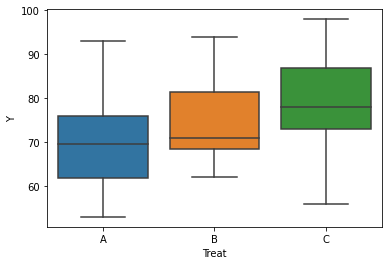

In [ ]:
sns.boxplot(x = 'Treat',y = 'Y',data = my_data)
plt.show()

In [ ]:
my_model = smf.ols('Y~Treat',data = my_data)
my_model = my_model.fit()
sm.stats.anova_lm(my_model)

,df,sum_sq,mean_sq,F,PR(>F)
Treat,2.0,306.404762,153.202381,0.974502,0.393806
Residual,21.0,3301.428571,157.210884,NaN,NaN


Treat : 표본(분자)  = 표본 평균 사이의 분산
처리 사이의 분산 

Residual: 전체 표본 내의 분산 

즉 

검정 통계량 = 153.202381 / 157.210884

In [21]:
len(my_data.Treat.unique())

3

In [23]:
print("전체 데이터의 길이", len(my_data))
print("분자의 자유도",len(my_data.Treat.unique()) -1)
print("분모의 자유도 ",len(my_data) - len(my_data.Treat.unique()))

전체 데이터의 길이 24
분자의 자유도 2
분모의 자유도  21


In [ ]:
1- st.f.cdf(2,21,0.974502)

0.5173906775753307